In [59]:
import pandas as pd
import matplotlib.pyplot as plt

import pyarrow.parquet as pq
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data = pd.read_csv('/Users/Boaz/Documents/DataMining/all_combined.csv')
data['mood'] = round(data['mood'])
data['circumplex.arousal'] = round(data['circumplex.arousal'])
data['circumplex.valence'] = round(data['circumplex.valence'])


In [60]:
target = []
for r in data['mood']:
    if r < 5:
        target.append(-1)
    if (r >= 5) & (r <=7):
        target.append(0)
    if r > 7:
        target.append(1)

data['target'] = target
# data = data.drop('time',axis = 1)
# data = data.drop('id',axis = 1)
# data = data.drop('mood',axis = 1)

In [67]:
d = {}
ids = data['id'].unique()
for id in ids:
    data_per_id = data.loc[(data['id'] == id)]
    data_time = data_per_id.set_index(['time'])
    data_time.index = pd.to_datetime(data_time.index)
    data_arima = data_time.sort_index()
    d["user{0}".format(id)] = data_arima

In [69]:
for user in d.keys():
    dataset = d[user]
    train = data.target[:951]
    test = data.target[951:]

                 id  days  mood  circumplex.arousal  circumplex.valence  \
time                                                                      
2014-02-26  AS14.01     1   6.0                -0.0                 1.0   
2014-02-27  AS14.01     2   6.0                 0.0                 0.0   
2014-03-21  AS14.01     3   6.0                 0.0                 0.0   
2014-03-22  AS14.01     4   6.0                 1.0                 1.0   
2014-03-23  AS14.01     5   7.0                 0.0                 1.0   
2014-03-24  AS14.01     6   6.0                 1.0                 0.0   
2014-03-25  AS14.01     7   7.0                 0.0                 0.0   
2014-03-26  AS14.01     8   7.0                -0.0                 1.0   
2014-03-27  AS14.01     9   7.0                 0.0                 1.0   
2014-03-28  AS14.01    10   6.0                -1.0                 1.0   
2014-03-29  AS14.01    11   8.0                 0.0                 1.0   
2014-03-30  AS14.01    12

[46 rows x 22 columns]
                 id  days  mood  circumplex.arousal  circumplex.valence  \
time                                                                      
2014-03-15  AS14.12     1   6.0                 0.0                -0.0   
2014-03-27  AS14.12     2   7.0                -0.0                 1.0   
2014-03-28  AS14.12     3   7.0                 0.0                 1.0   
2014-03-29  AS14.12     4   7.0                 1.0                 1.0   
2014-03-30  AS14.12     5   6.0                -0.0                 0.0   
2014-03-31  AS14.12     6   6.0                 0.0                 0.0   
2014-04-01  AS14.12     7   6.0                 0.0                 1.0   
2014-04-02  AS14.12     8   6.0                -0.0                 0.0   
2014-04-03  AS14.12     9   5.0                 0.0                 0.0   
2014-04-04  AS14.12    10   6.0                 1.0                 0.0   
2014-04-05  AS14.12    11   6.0                 0.0                 0.0   
20

[55 rows x 22 columns]
                 id  days  mood  circumplex.arousal  circumplex.valence  \
time                                                                      
2014-03-13  AS14.16     1   8.0                -0.0                 2.0   
2014-03-14  AS14.16     2   7.0                -0.0                 1.0   
2014-03-15  AS14.16     3   6.0                 0.0                 1.0   
2014-03-16  AS14.16     4   7.0                -1.0                 1.0   
2014-03-17  AS14.16     5   7.0                -1.0                 1.0   
2014-03-18  AS14.16     6   7.0                 0.0                 1.0   
2014-03-19  AS14.16     7   6.0                 0.0                 1.0   
2014-03-20  AS14.16     8   6.0                 1.0                 0.0   
2014-03-21  AS14.16     9   7.0                 1.0                 1.0   
2014-03-22  AS14.16    10   6.0                 0.0                 1.0   
2014-03-23  AS14.16    11   7.0                 0.0                 1.0   
20

                 id  days  mood  circumplex.arousal  circumplex.valence  \
time                                                                      
2014-03-31  AS14.28     1   6.0                 0.0                 0.0   
2014-04-01  AS14.28     2   8.0                 0.0                 0.0   
2014-04-02  AS14.28     3   7.0                -0.0                 0.0   
2014-04-03  AS14.28     4   8.0                 0.0                 1.0   
2014-04-04  AS14.28     5   6.0                -0.0                 0.0   
2014-04-05  AS14.28     6   8.0                -1.0                 1.0   
2014-04-06  AS14.28     7   7.0                -1.0                 1.0   
2014-04-07  AS14.28     8   8.0                 0.0                 1.0   
2014-04-08  AS14.28     9   8.0                -0.0                 1.0   
2014-04-09  AS14.28    10   7.0                -1.0                 1.0   
2014-04-10  AS14.28    11   7.0                -1.0                 0.0   
2014-04-11  AS14.28    12

In [16]:
train = data.target[:951]
test = data.target[951:]
print(len(test))
# forecasting 317 points

317


In [ ]:
#!pip install pmdarima 

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=966.875, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1218.025, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1076.052, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1122.432, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=965.746, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1030.529, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=966.856, Time=0.71 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=961.093, Time=1.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=966.006, Time=0.52 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=968.235, Time=1.01 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=968.816, Time=0.64 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=966.812, Time=0.97 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=970.180, Time=1.10 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=951.899, Time=0.63 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=9

In [18]:
n_periods = 317
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
fc.values

array([0.24694851, 0.23957863, 0.23314495, 0.22752855, 0.2226256 ,
       0.21834549, 0.21460908, 0.21134732, 0.2084999 , 0.20601419,
       0.20384424, 0.20194994, 0.20029628, 0.19885269, 0.19759248,
       0.19649235, 0.19553197, 0.1946936 , 0.19396172, 0.19332281,
       0.19276507, 0.19227817, 0.19185313, 0.19148208, 0.19115816,
       0.1908754 , 0.19062855, 0.19041306, 0.19022494, 0.19006072,
       0.18991737, 0.18979222, 0.18968297, 0.1895876 , 0.18950434,
       0.18943166, 0.18936821, 0.18931282, 0.18926447, 0.18922226,
       0.18918542, 0.18915325, 0.18912517, 0.18910065, 0.18907925,
       0.18906057, 0.18904427, 0.18903003, 0.1890176 , 0.18900675,
       0.18899728, 0.18898901, 0.1889818 , 0.18897549, 0.18896999,
       0.18896519, 0.188961  , 0.18895734, 0.18895415, 0.18895136,
       0.18894892, 0.1889468 , 0.18894494, 0.18894332, 0.18894191,
       0.18894068, 0.1889396 , 0.18893866, 0.18893784, 0.18893712,
       0.1889365 , 0.18893595, 0.18893547, 0.18893506, 0.18893

In [13]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': inf,
 'me': -0.24180373842679834,
 'mae': 0.45888728892128716,
 'mpe': inf,
 'rmse': 0.5520858362168706,
 'corr': -0.13727306485901244,
 'minmax': 0.9181688575226228}

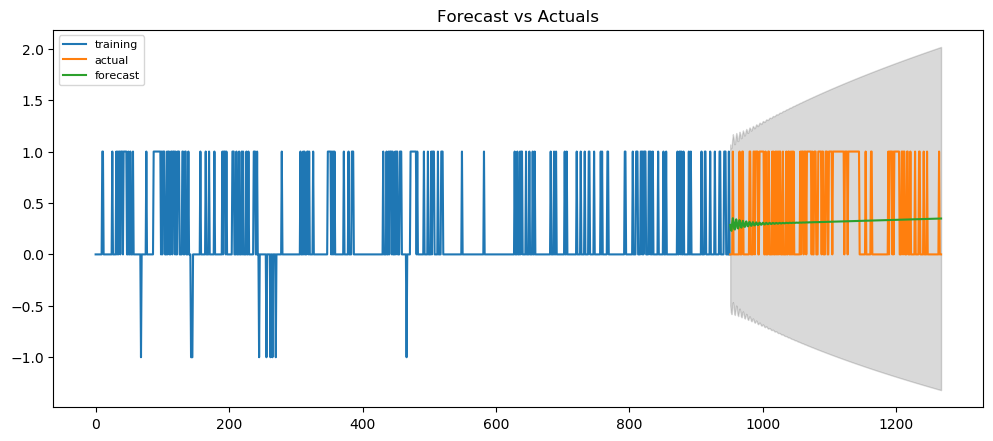

In [76]:
# Build Model
model = ARIMA(train, order=(3, 1, 3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(317, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


{'mape': inf,
 'me': -0.11343772883599001,
 'mae': 0.475417298882478,
 'mpe': inf,
 'rmse': 0.5086121428236583,
 'corr': -0.0002364334775461686,
 'minmax': 0.8622508577078145}